In [244]:
from linmix import linmix

In [245]:
import matplotlib.pyplot as plt
import numpy as np

In [246]:
from Cumulative_spectral_indices import flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, ricci_taurus_fluxes_1mm, spectral_indices_taurus, flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, flux_lupus_1_mm, tazzari_lupus_spectral_indices

lm = linmix.LinMix(flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, xsig[:17], ysig[:17], K=2)
lm.run_mcmc(silent=True)

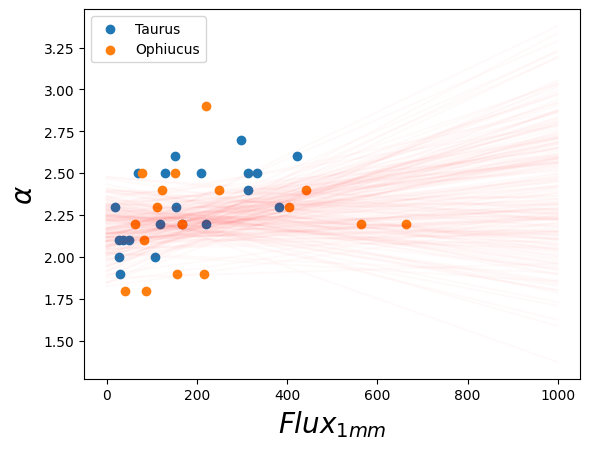

In [247]:
for i in range(0, 5000, 25):
    xs = np.arange(0,1000)
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='r', alpha=0.02)

plt.scatter(ricci_taurus_fluxes_1mm, spectral_indices_taurus, label='Taurus')
plt.scatter(flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, label='Ophiucus')

plt.xlabel('$Flux_{1mm}$', fontsize=20), plt.ylabel(r'$\alpha$', fontsize=20)
plt.legend()
ax.tick_params(which='both', labelsize=15)
plt.show()

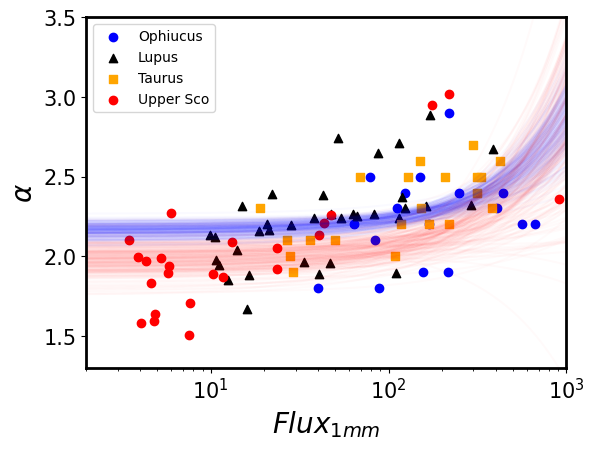

In [248]:
fig, ax = plt.subplots()

# set thickness axis
plt.setp(ax.spines.values(), linewidth=2)

# avoid axis labels being cut
plt.gcf().subplots_adjust(bottom=0.15, left=0.15)

total_fluxes = ricci_taurus_fluxes_1mm + flux_lupus_1_mm + flux_list_ophiucus_ricci_1mm
total_spectra_indices = spectral_indices_taurus + tazzari_lupus_spectral_indices + spectral_index_ophiucus

xsig = [0] * 100
ysig = [0] * 100
lm = linmix.LinMix(total_fluxes, total_spectra_indices, xsig[:len(total_fluxes)], ysig[:len(total_fluxes)], K=2)
lm.run_mcmc(silent=True)
for i in range(0, 5000, 25):
    xs = np.arange(2, 1000)
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    line1, = plt.plot(xs, ys, color='b', alpha=0.02)

lm = linmix.LinMix(flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, xsig[:len(flux_barenfeld_0_88mm_updated)], ysig[:len(flux_barenfeld_0_88mm_updated)], K=2)
lm.run_mcmc(silent=True)
for i in range(0, 5000, 25):
    xs = np.arange(2, 1000)
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    line2, = plt.plot(xs, ys, color='r', alpha=0.02)


plt.scatter(flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, label='Ophiucus', color='blue')
plt.scatter(flux_lupus_1_mm, tazzari_lupus_spectral_indices, label='Lupus', marker='^', color='black')
plt.scatter(ricci_taurus_fluxes_1mm, spectral_indices_taurus, label='Taurus', marker='s', color='orange')
plt.scatter(flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, label='Upper Sco', color='red')
plt.xticks(np.array(np.arange(1.4, 3.1, 0.1)))

plt.xlabel('$Flux_{1mm}$', fontsize=20), plt.ylabel(r'$\alpha$', fontsize=20)
plt.xscale('log')
plt.legend()
plt.xlim(2, 1000), plt.ylim(1.3, 3.5)
ax.tick_params(which='both', labelsize=15)
plt.show()